# Visualizing Automobile Data for Regression

In [1]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['Automobile price data (Raw)']
auto_price = ds.to_dataframe()

# Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric,
                                          args = ('coerce', ))
# Remove rows with missing values
auto_price.dropna(axis = 0, inplace = True)

# Compute the log of the auto price
auto_price['lnprice'] = np.log(auto_price.price)

# Create a column with new levels for the number of cylinders
auto_price['num-cylinders'] = ['four-or-less' if x in ['two',
                                                      'three',
                                                      'four'] else
                               ('five-six' if x in ['five',
                                                   'six'] else
                                'eight-twelve')
                               for x in auto_price['num-of-cylinders']
                              ]
print(auto_price.dtypes)
auto_price.head(5)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
lnprice              float64
num-cylinders         object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,lnprice,num-cylinders
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,9.510075,four-or-less
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,9.711116,four-or-less
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.711116,five-six
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.543235,four-or-less
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,9.767095,five-six


## Create a pair-wise scatter plot

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


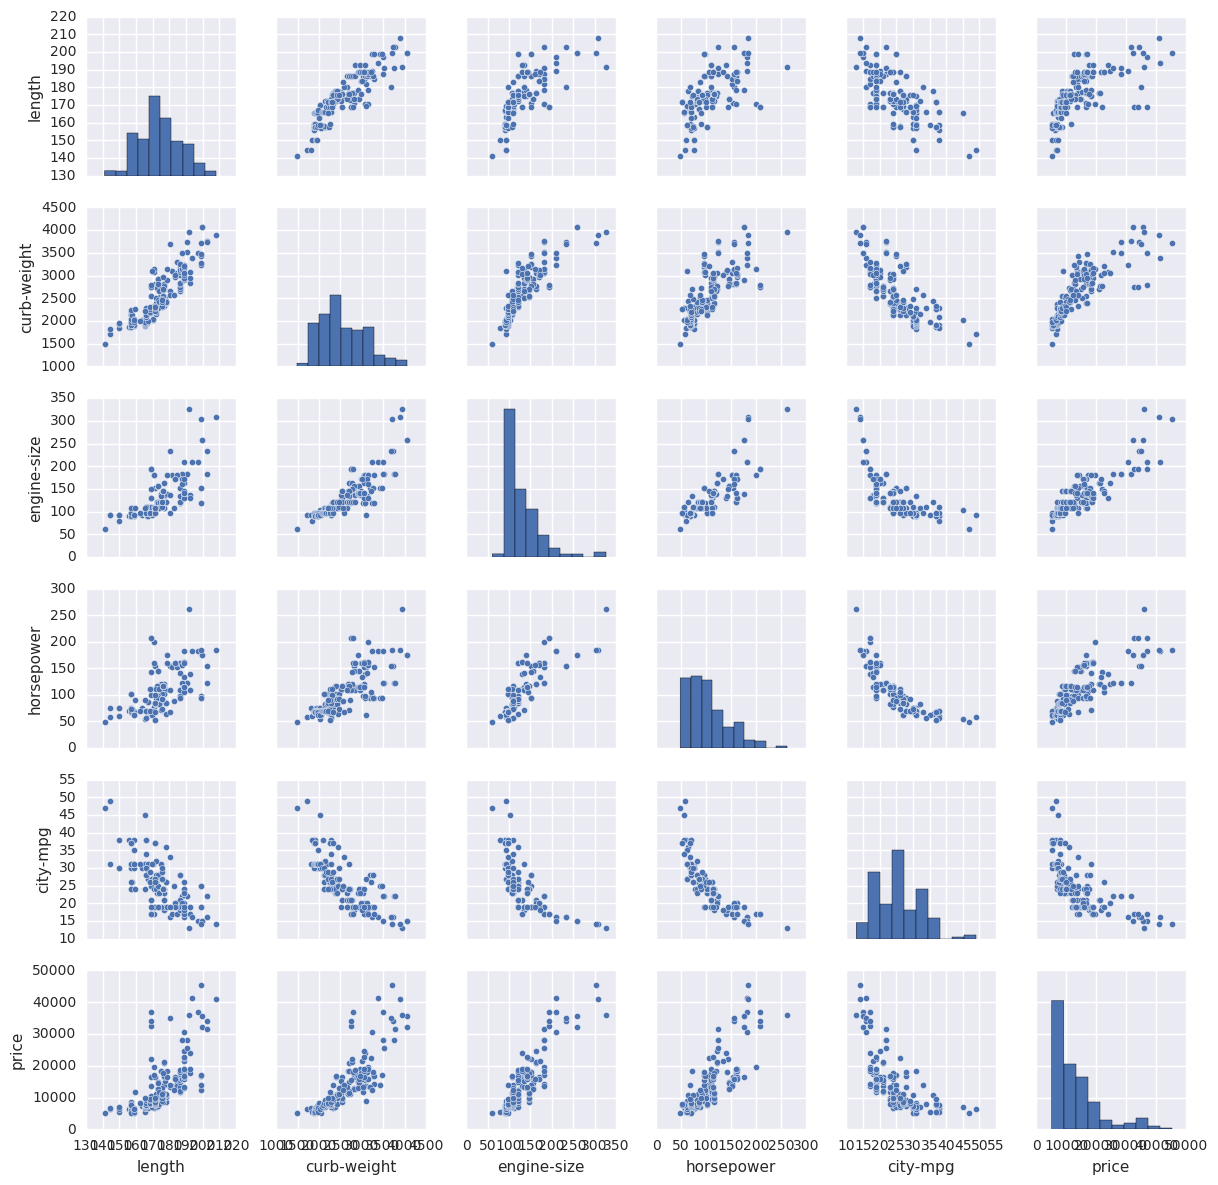

In [2]:
import seaborn as sns
num_cols = ['length', 'curb-weight', 'engine-size', 'horsepower',
           'city-mpg', 'price', 'fuel-type']
sns.pairplot(auto_price[num_cols], size = 2)

## Create histogram

'drive-wheels'

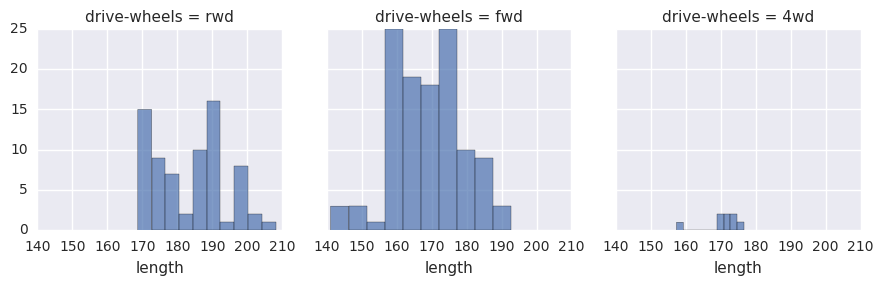

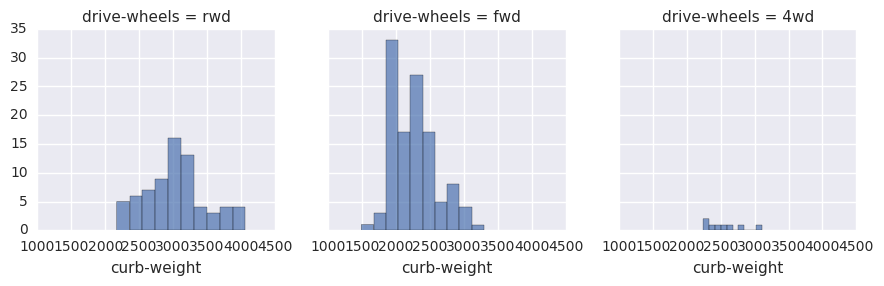

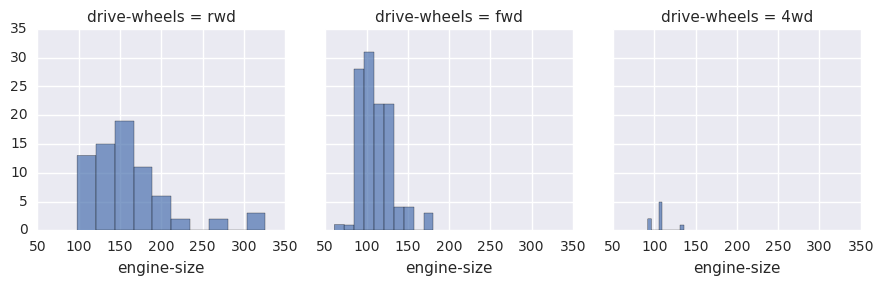

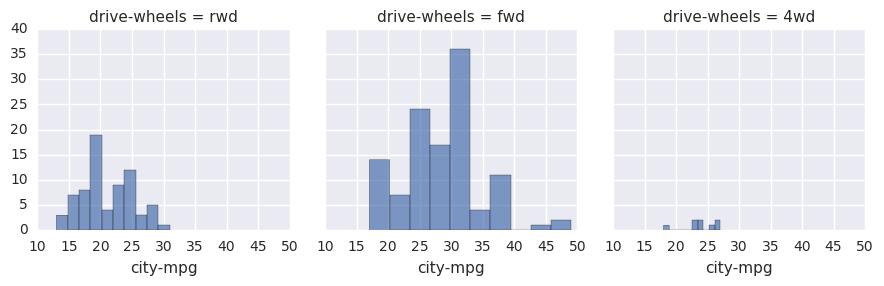

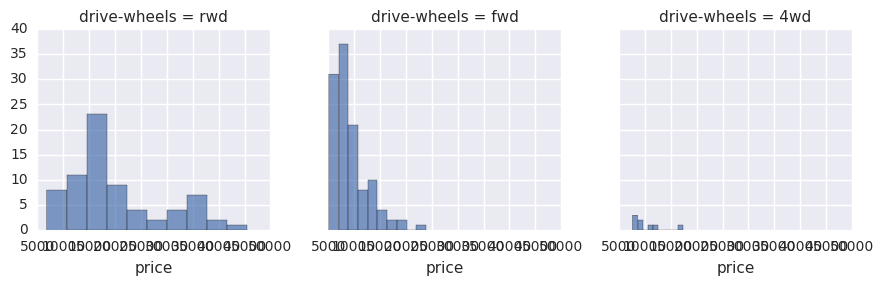

In [3]:
# Function to plot conditioned histograms
import matplotlib.pyplot as plt
def cond_hists(df, plot_cols, grid_col):
    # Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col = grid_col)
        grid1.map(plt.hist, col, alpha = .7)
    return grid_col

# Define columns for making a conditioned histogram
plot_cols2 = ['length', 'curb-weight', 'engine-size', 'city-mpg',
             'price']
cond_hists(auto_price, plot_cols2, 'drive-wheels')

## Create box plots

'drive-wheels'

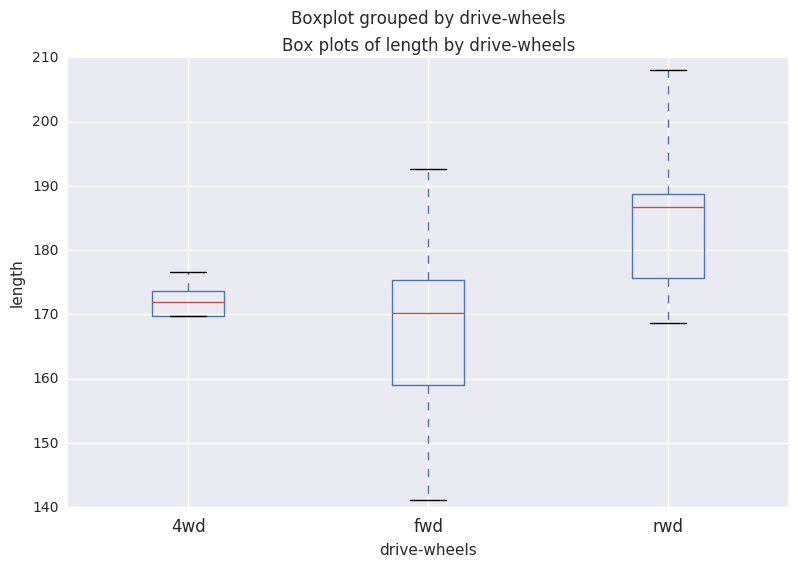

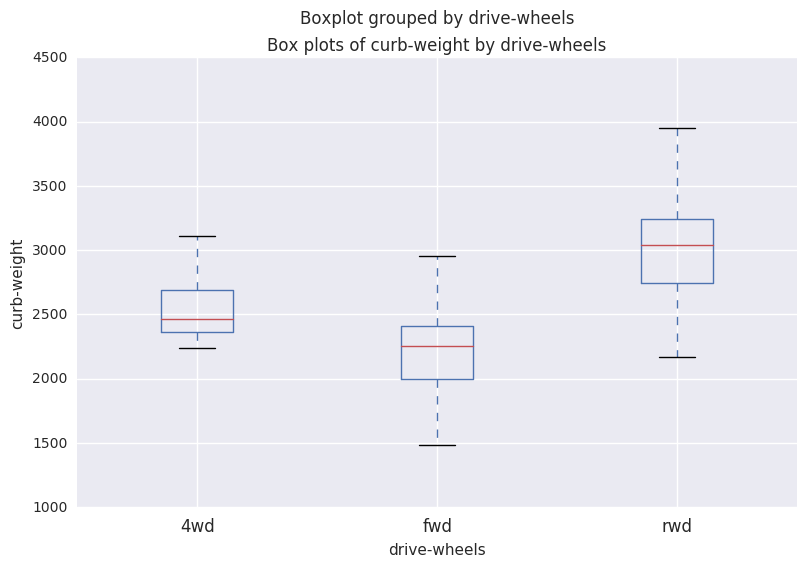

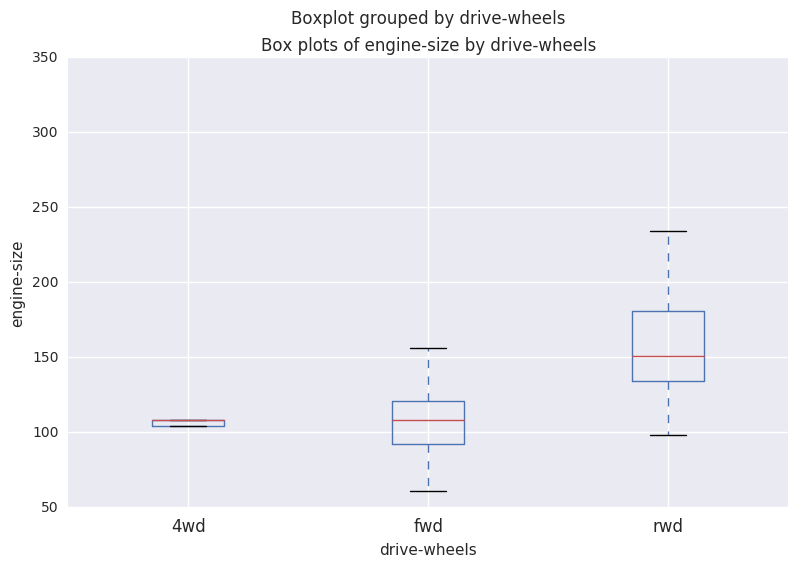

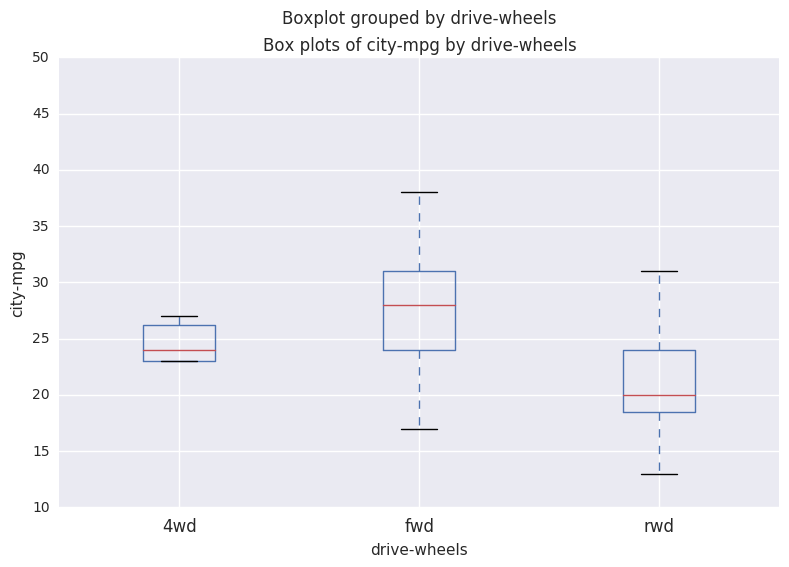

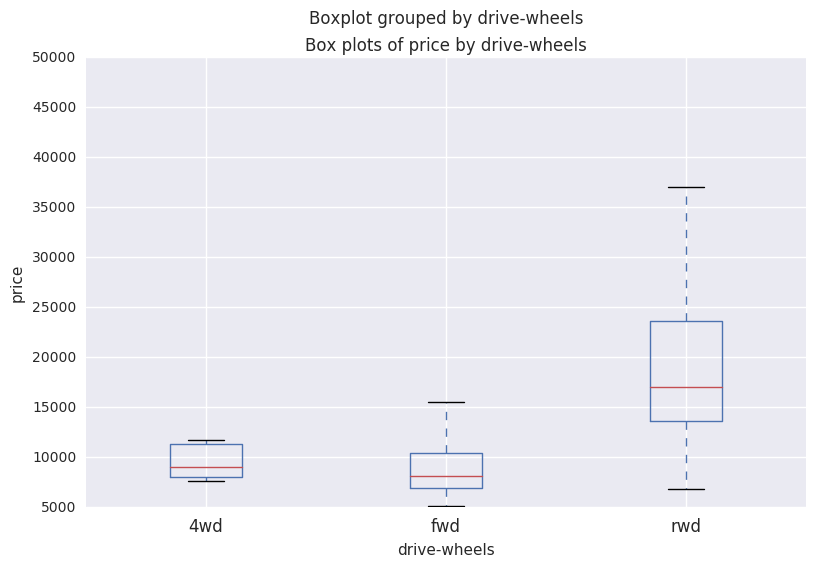

In [6]:
# Create boxplots of data
def auto_boxplot(df, plot_cols, by):
    for col in plot_cols:
        fig = plt.figure(figsize = (9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by
auto_boxplot(auto_price, plot_cols2, 'drive-wheels')

## Create scatter plots

['length', 'curb-weight', 'engine-size', 'city-mpg']

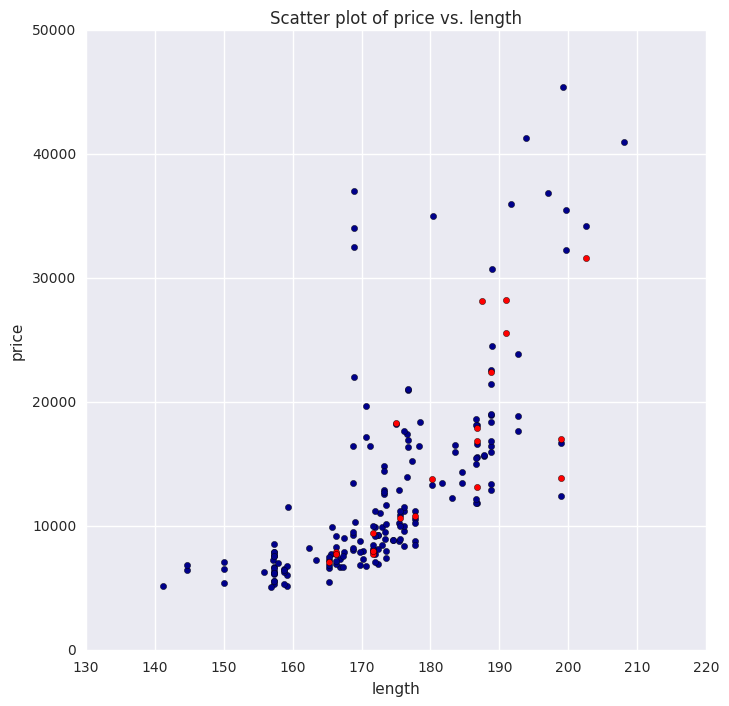

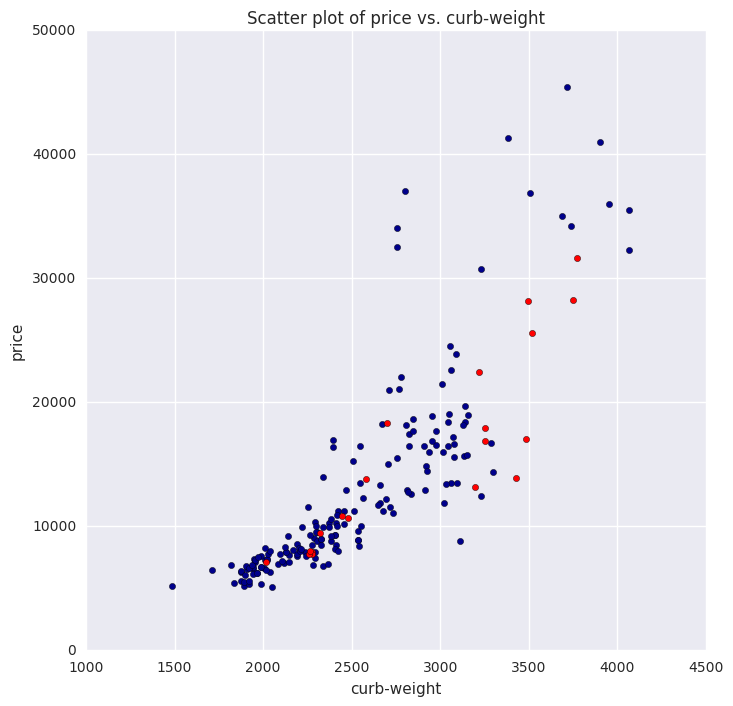

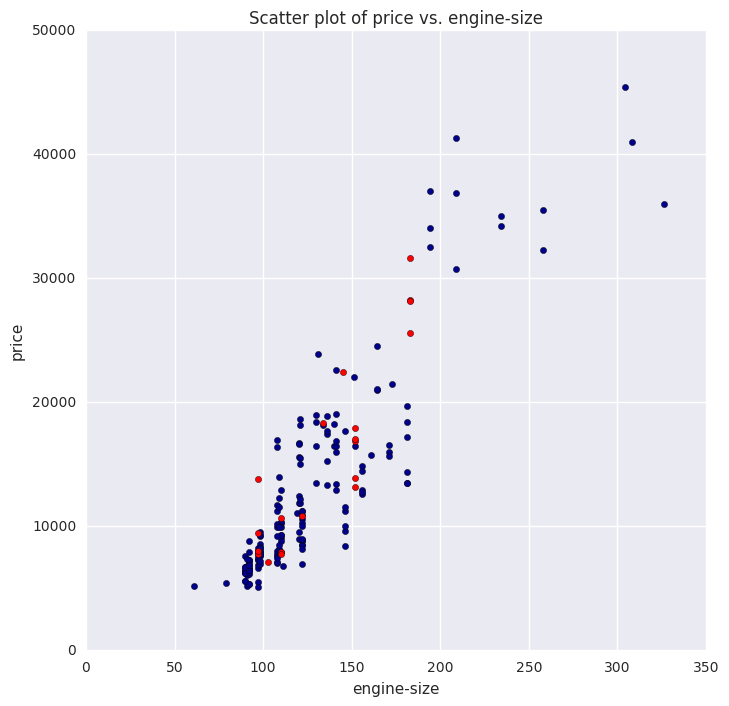

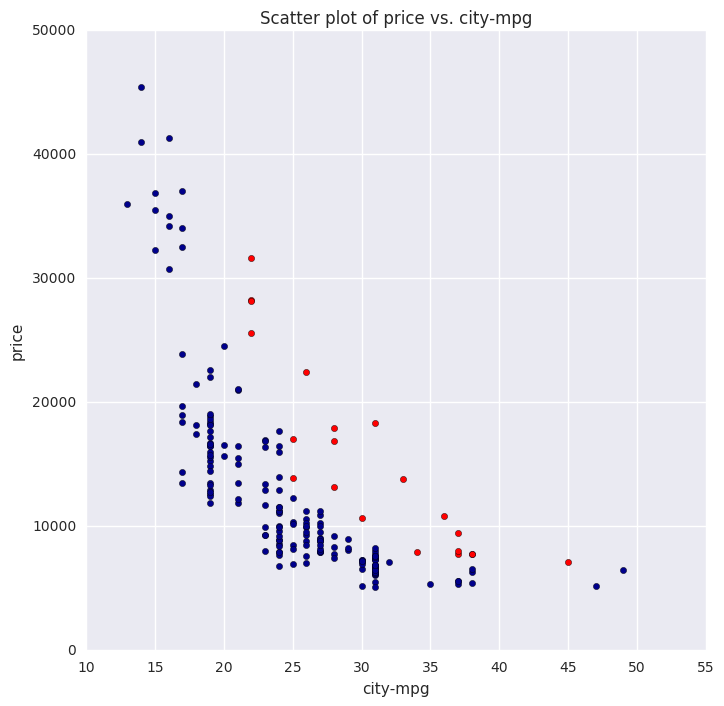

In [7]:
# Create scatter plot
def auto_scatter(df, plot_cols):
    for col in plot_cols:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:
            temp1.plot(kind = 'scatter', x = col, y = 'price',
                      ax = ax, color = 'DarkBlue')
        if temp2.shape[0] > 0:
            temp2.plot(kind = 'scatter', x = col, y = 'price',
                      ax = ax, color = 'Red')
        ax.set_title('Scatter plot of price vs. ' + col)
    return plot_cols
# Define columns for making scatter plots
plot_cols3 = ['length', 'curb-weight', 'engine-size', 'city-mpg']
auto_scatter(auto_price, plot_cols3)

## Create conditioned scatter plots

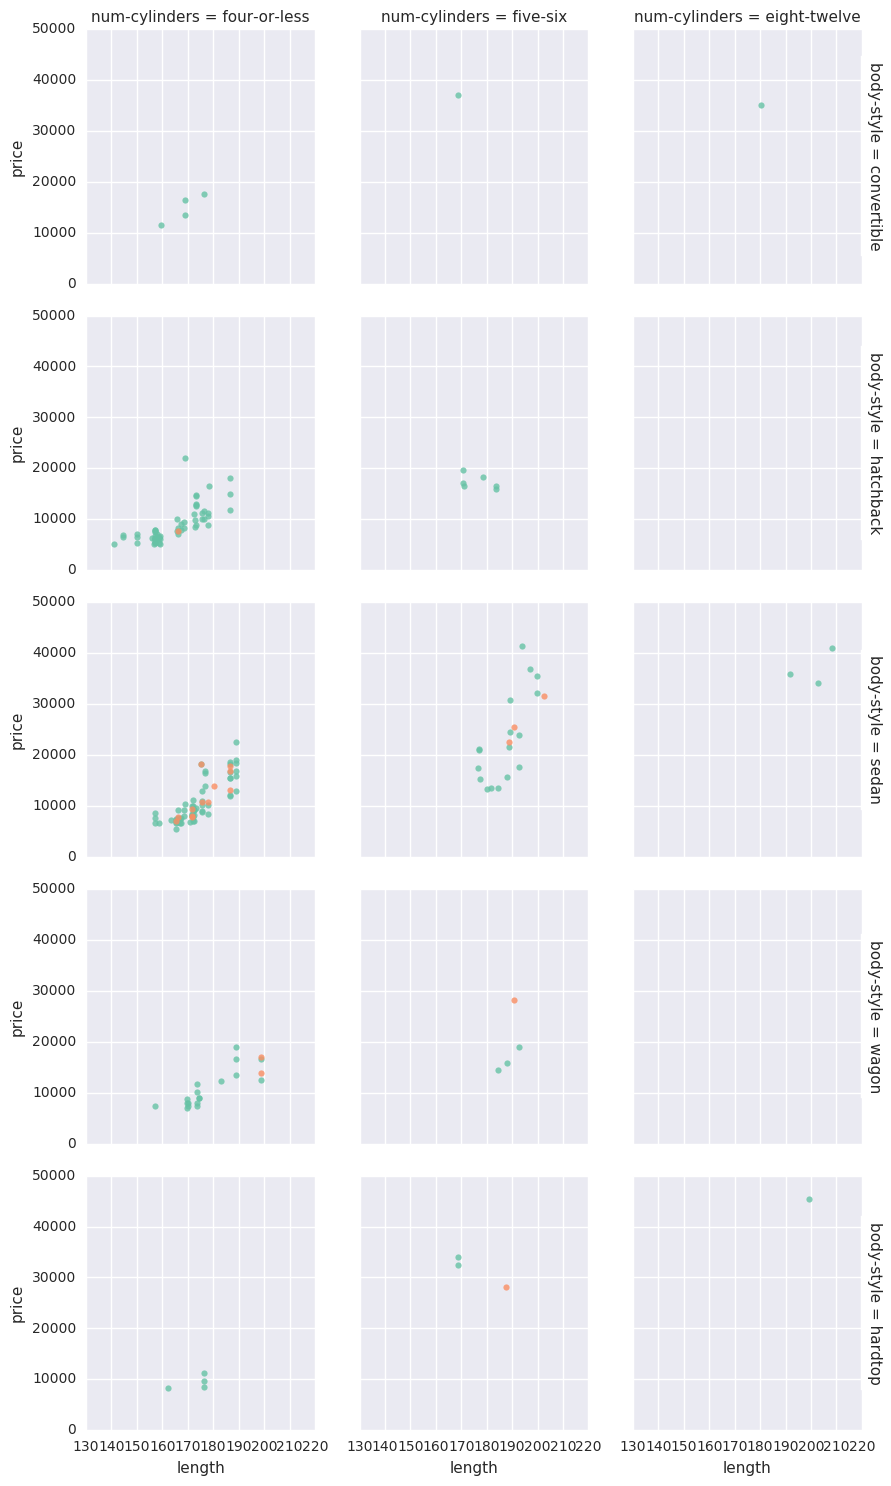

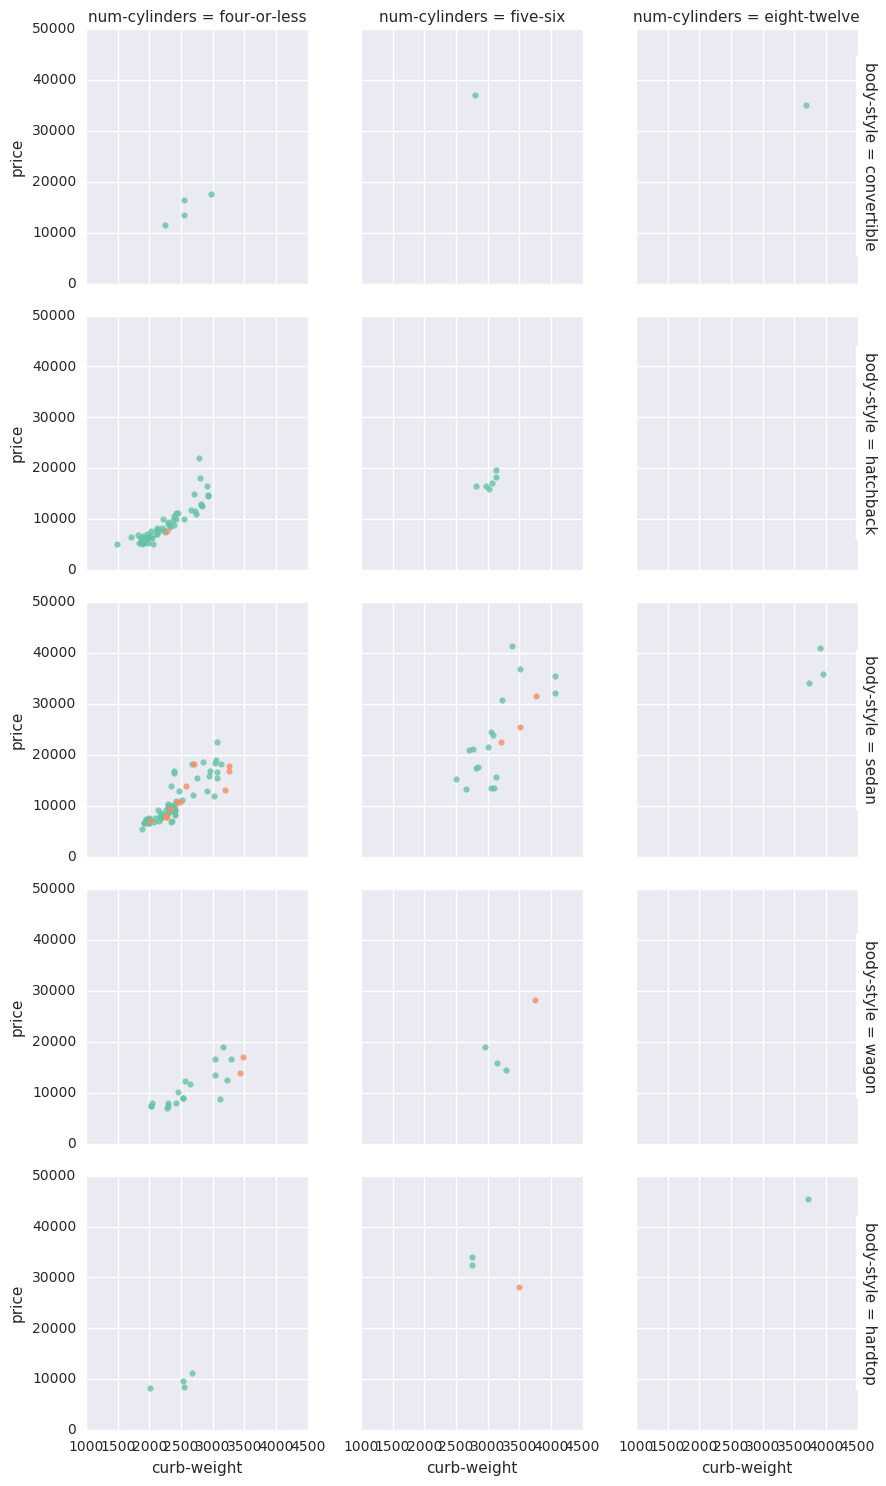

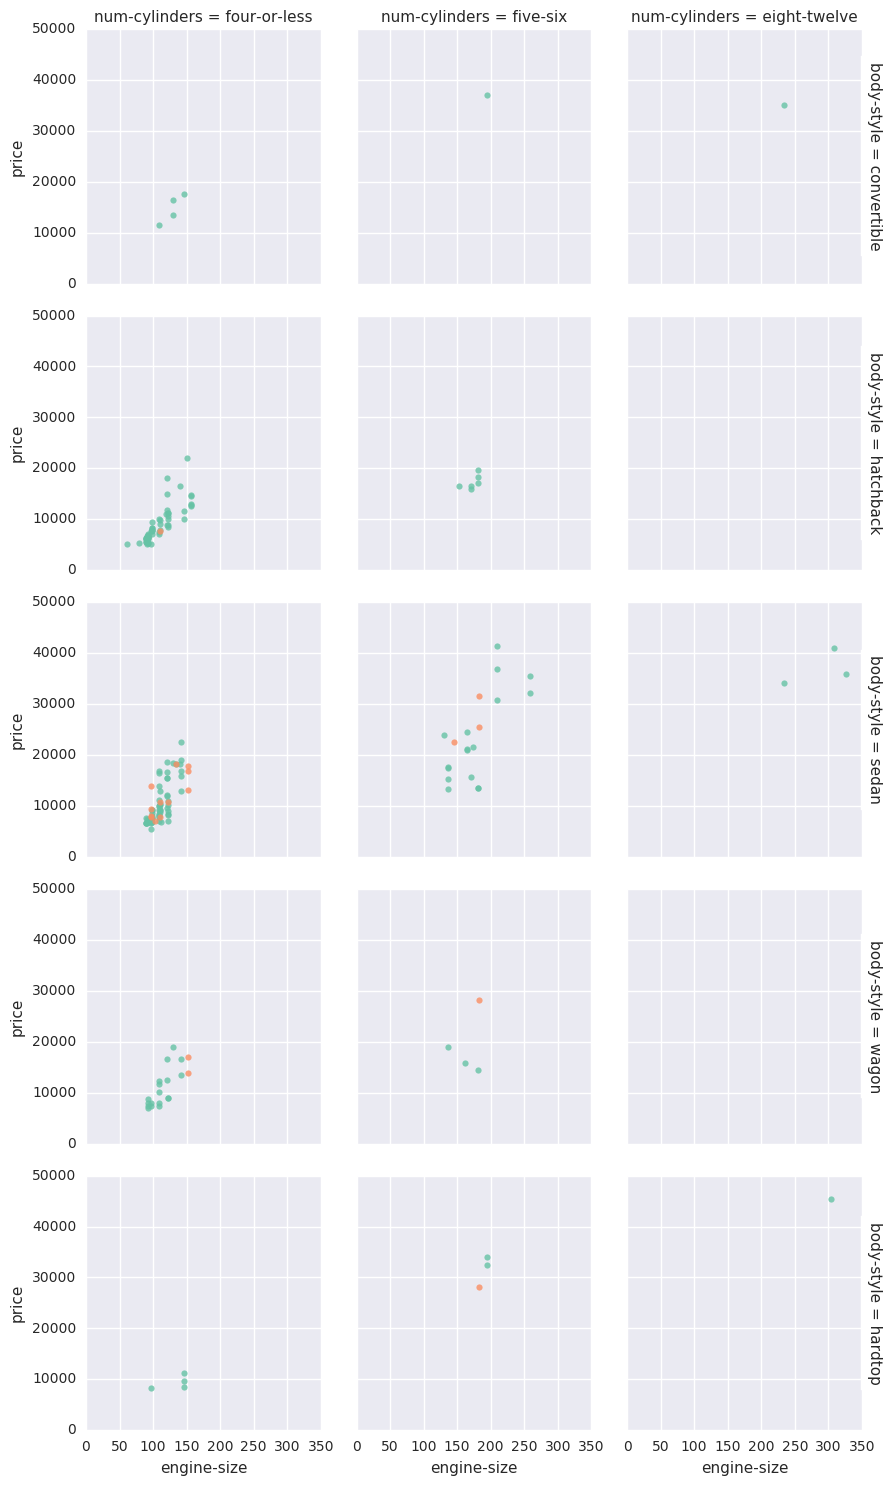

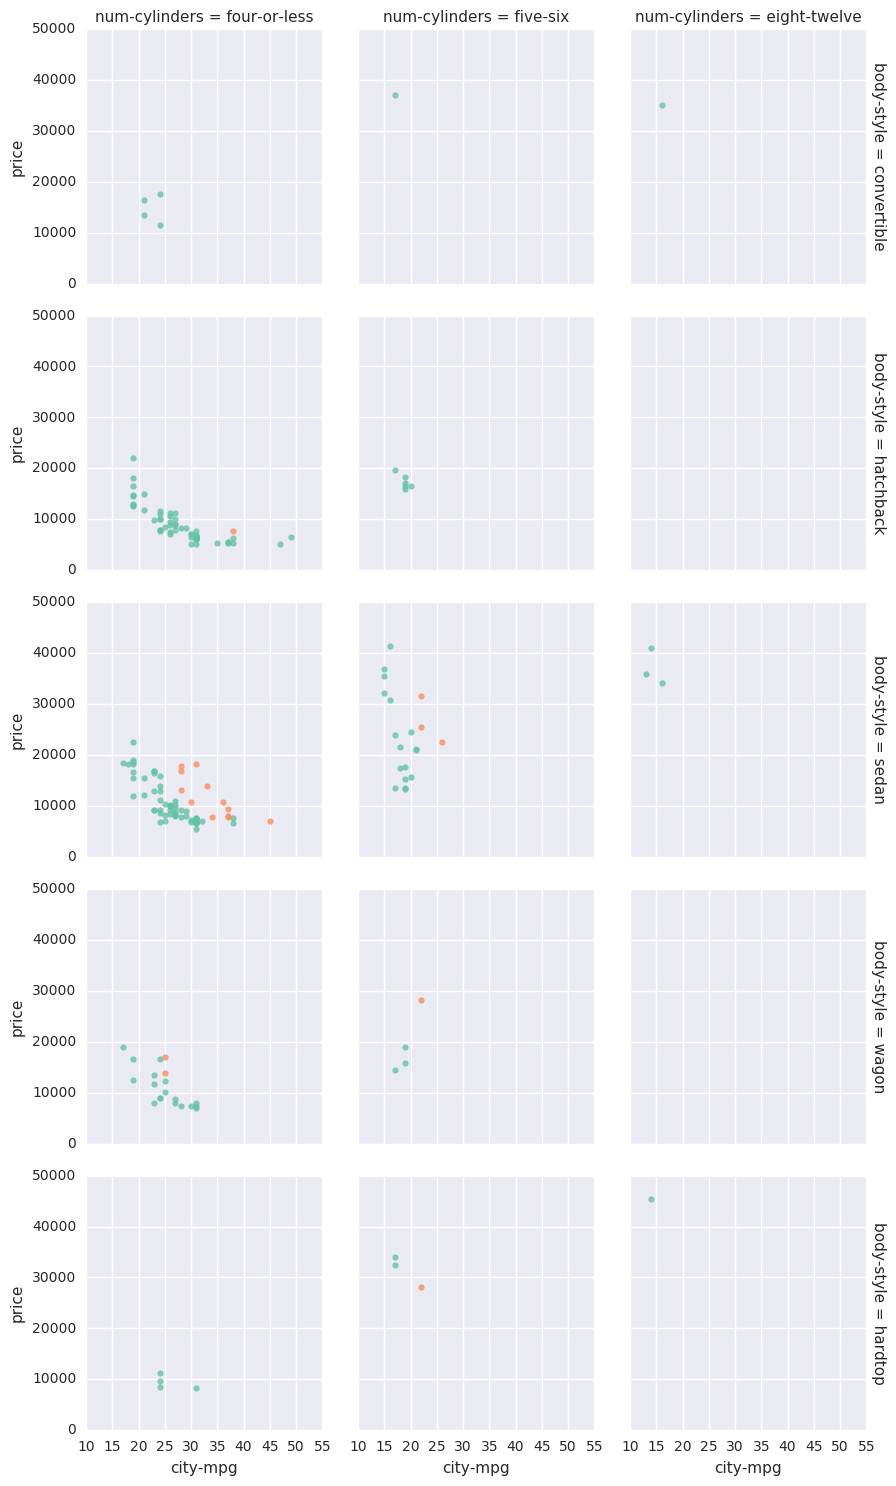

In [9]:
import IPython.html.widgets
def cond_plot(cols):
    for col in cols:
        g = sns.FacetGrid(auto_price, col = 'num-cylinders',
                         row = 'body-style', hue = 'fuel-type',
                         palette = 'Set2', margin_titles = True)
        g.map(sns.regplot, col, 'price', fit_reg = False)
cond_plot(plot_cols3)

# Visualizing adult census data for classification

In [2]:
%matplotlib inline
from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets[
    'Adult Census Income Binary Classification dataset'
]
income = ds.to_dataframe()
print(income.dtypes)
income.head(5)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Bar plot the categorical features

'Done'

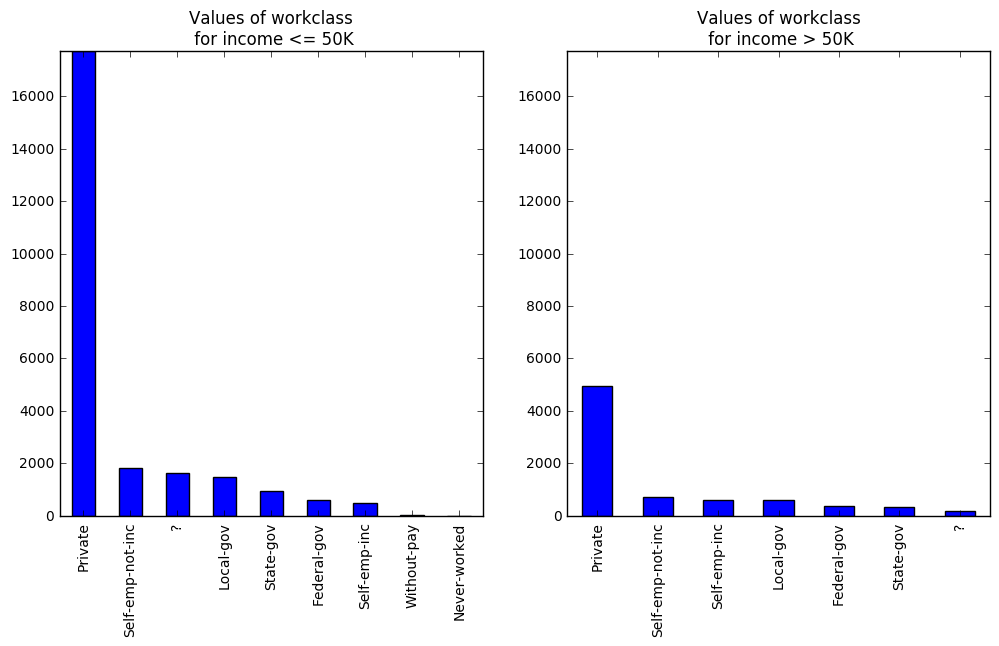

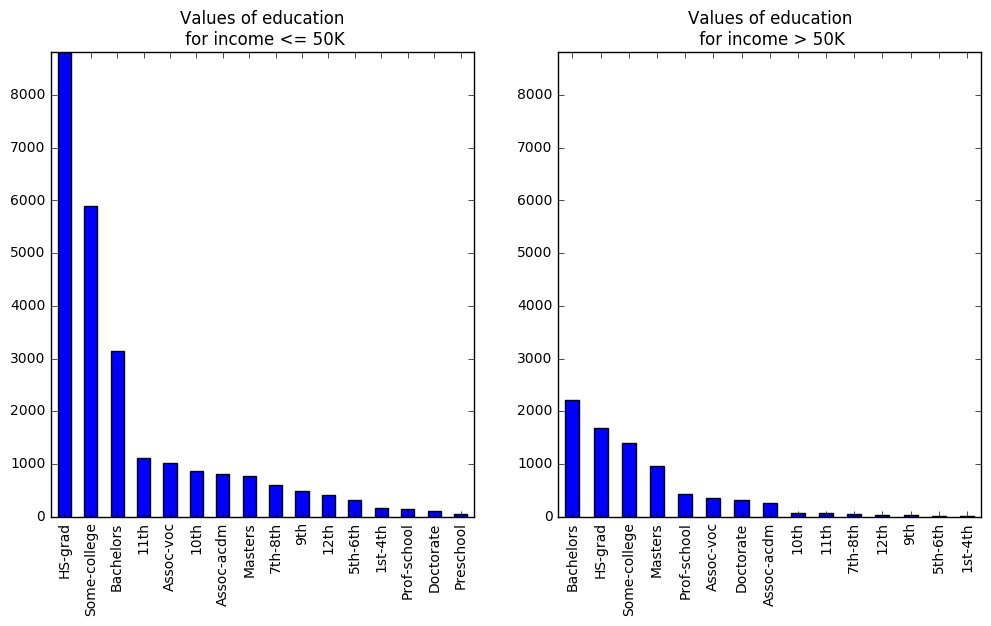

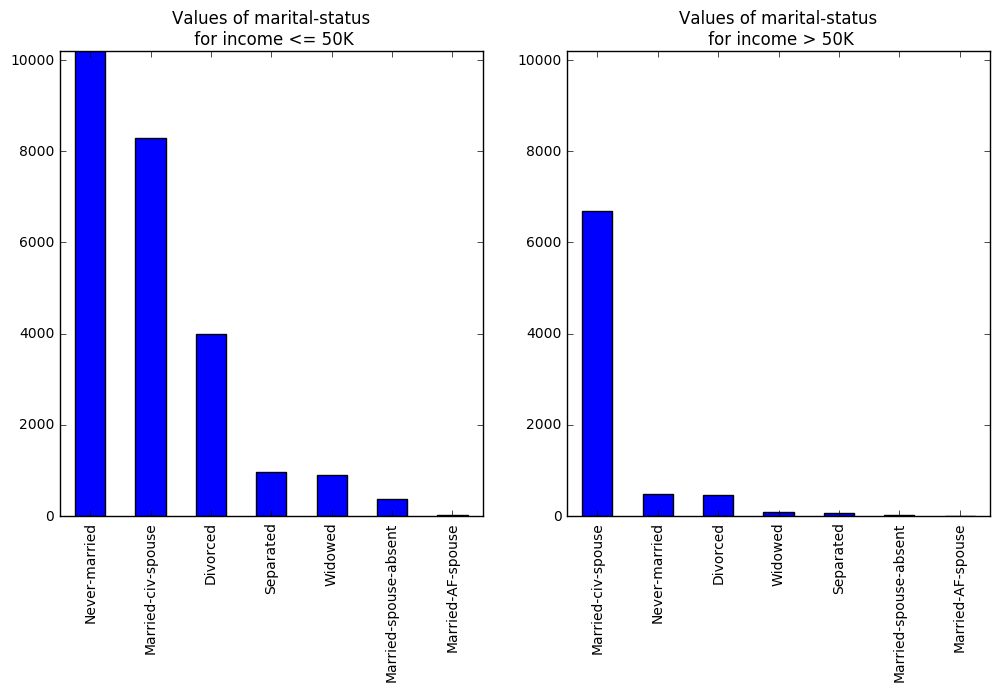

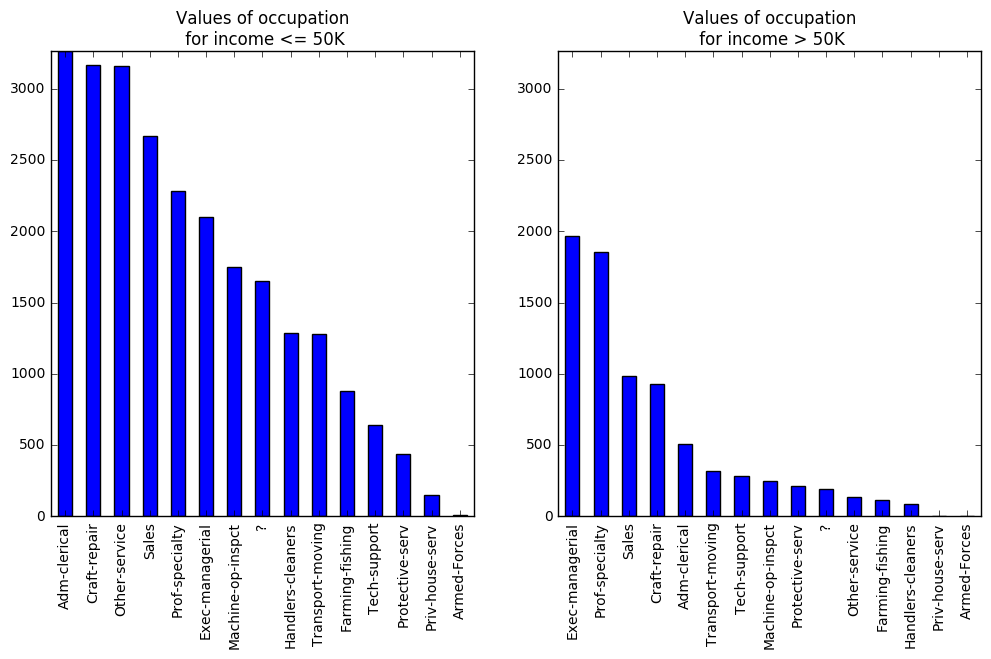

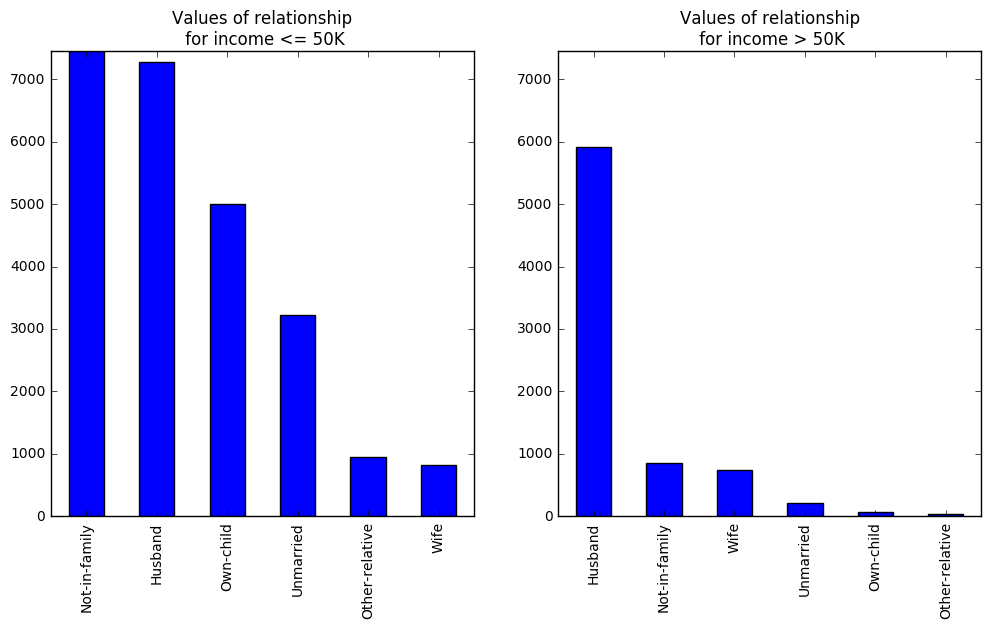

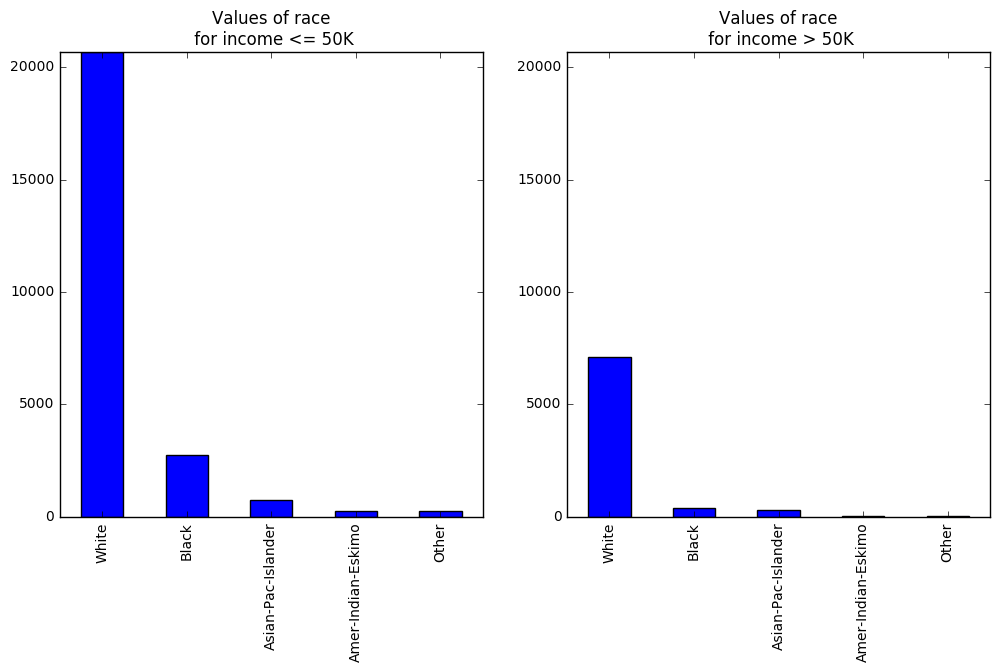

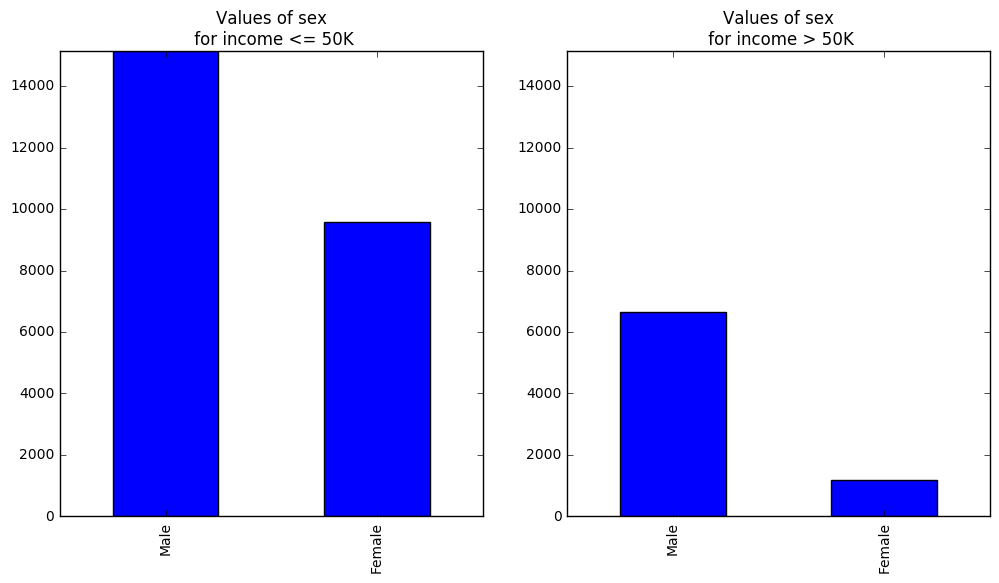

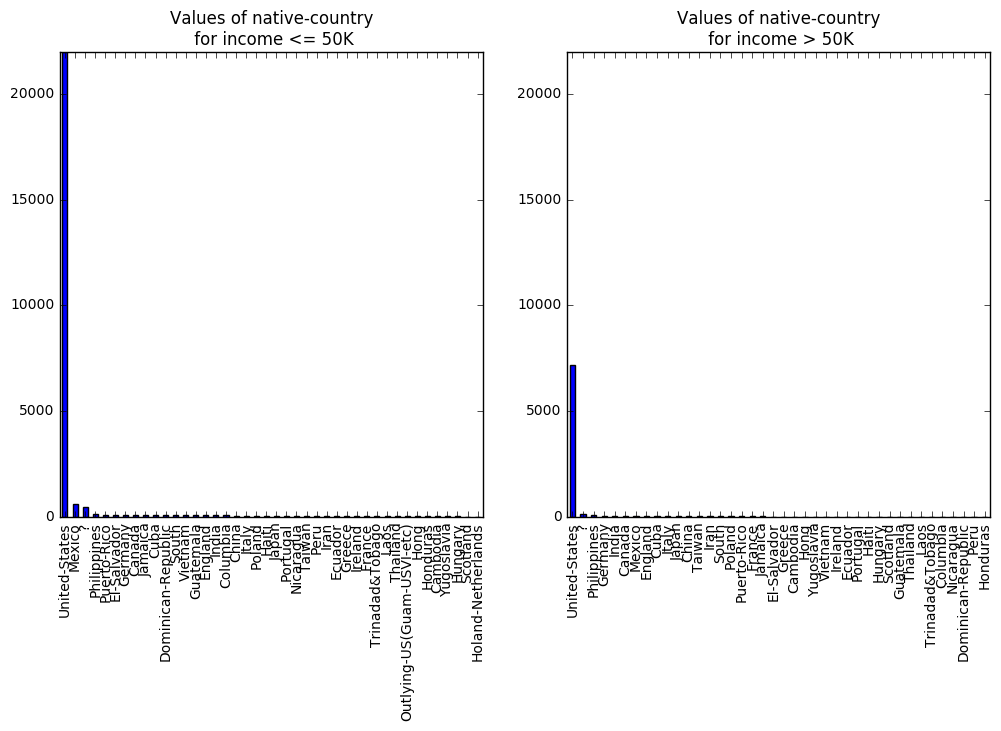

In [3]:
# Plot categorical variables as bar plots
import matplotlib.pyplot as plt
def income_barplot(df):
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df.ix[:, col].dtype not in [np.int64, np.int32,
                                       np.float64]):
            temp0 = df.ix[
                df['income'] == '>50K', col].value_counts()
            temp1 = df.ix[
                df['income'] == '<=50K', col].value_counts()
            ylim = [0, max(max(temp0), max(temp1))]
            fig = plt.figure(figsize = (12, 6))
            fig.clf()
            ax0 = fig.add_subplot(1, 2, 2)
            ax1 = fig.add_subplot(1, 2, 1)
            temp0.plot(kind = 'bar', ax = ax0, ylim = ylim)
            ax0.set_title('Values of ' + col +
                          '\n for income > 50K')
            temp1.plot(kind = 'bar', ax = ax1, ylim = ylim)
            ax1.set_title('Values of ' + col +
                         '\n for income <= 50K')
    return('Done')
income_barplot(income)

## Box plot the numeric features

'Done'

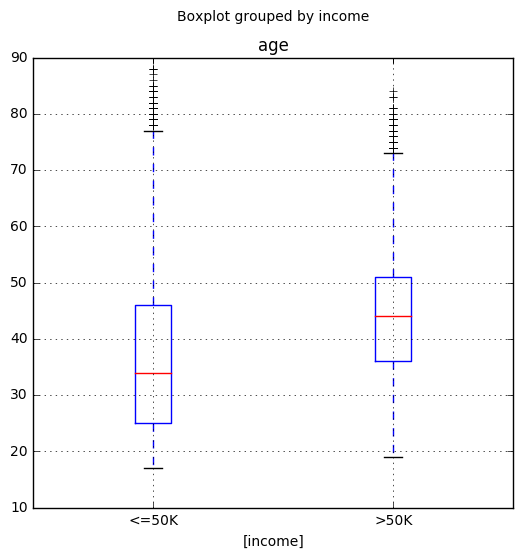

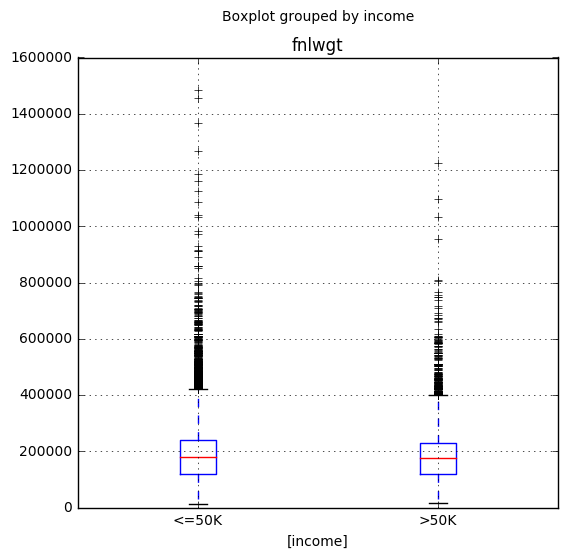

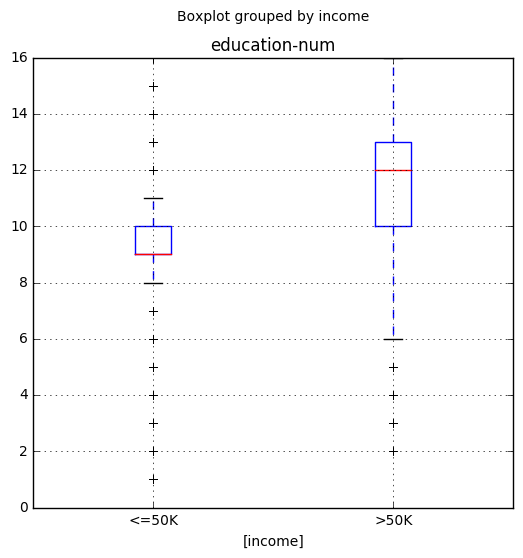

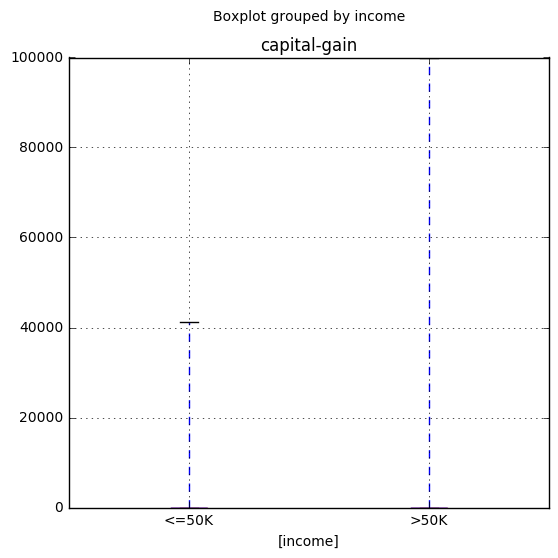

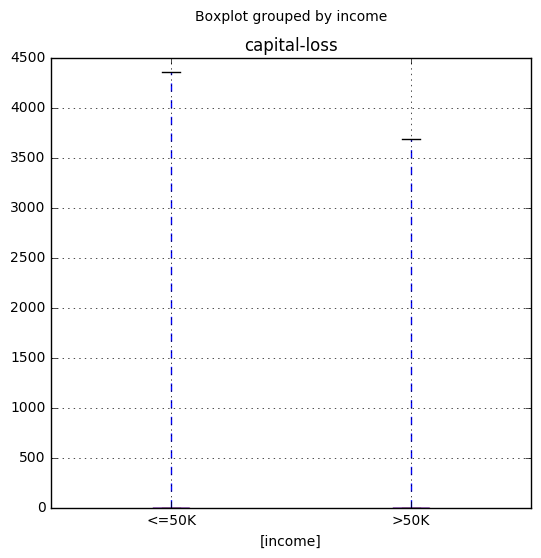

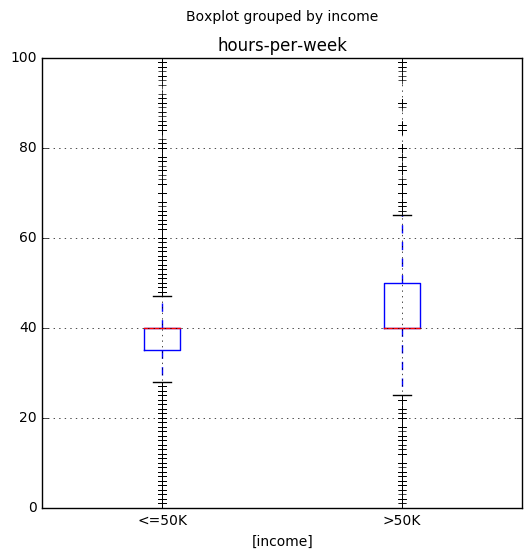

In [4]:
# Plot categorical variables as box plots
def income_boxplot(df):
    cols = df.columns.tolist()[:-1]
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            fig = plt.figure(figsize = (6, 6))
            fig.clf()
            ax = fig.gca()
            df.boxplot(column = [col], ax = ax, by = ['income'])
    return('Done')
income_boxplot(income)